In [1]:
import pandas
import seaborn as sns

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(f"\nDataset shape:\n{df.shape}")
print(f'\nData types:\n{df.dtypes}')
print(f'\nMissing values:\n{df.isnull().sum()}')


Dataset shape:
(53940, 10)

Data types:
carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

Missing values:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [15]:
statistis = df.describe().T

In [5]:
# Reglas básicas
print("Precios <= 0:", (df['price'] <= 0).sum())
print("Carat <= 0:", (df['carat'] <= 0).sum())

Precios <= 0: 0
Carat <= 0: 0


<AxesSubplot:xlabel='price'>

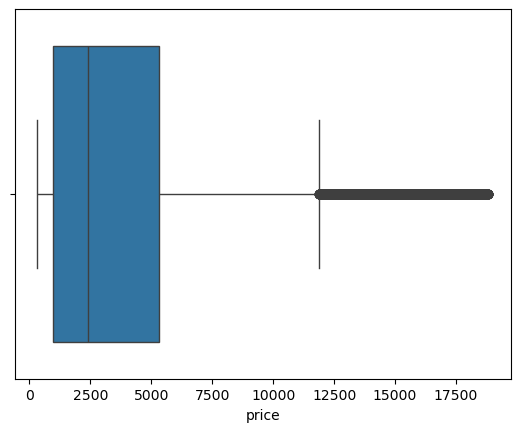

In [6]:
sns.boxplot(
    data = df,
    x = 'price'
)

In [7]:
# Usando IQR para price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print("Outliers (IQR):", len(outliers))

# Usando Z-score
from scipy.stats import zscore
df['z_score_price'] = zscore(df['price'])
print("Outliers (Z > 3):", (df['z_score_price'].abs() > 3).sum())

Outliers (IQR): 3540
Outliers (Z > 3): 1206


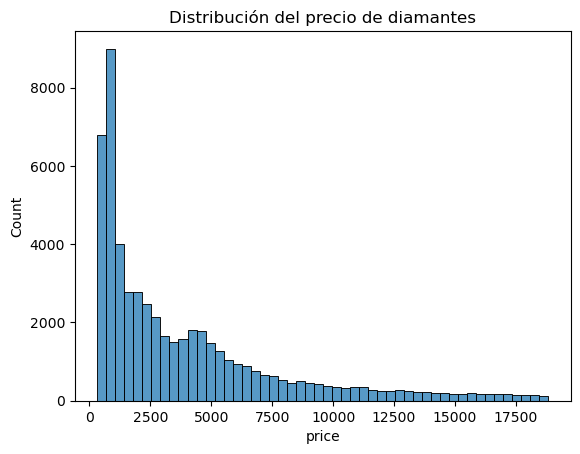

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'], bins=50, fill = True)
plt.title("Distribución del precio de diamantes")
plt.show()

In [ ]:
total = len(df)
print("Tasa de nulos:", round(df.isnull().sum().sum() / (total * len(df.columns)), 4))
print("Tasa de precios negativos o cero:", round((df['price'] <= 0).sum() / total, 4))
print("Tasa de outliers (Z-score):", round((df['z_score_price'].abs() > 3).sum() / total, 4))

53940
11
Tasa de nulos: 0.0
Tasa de precios negativos o cero: 0.0
Tasa de outliers (Z-score): 0.0224


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

# Paso 1: Cargar los datos
df = pd.read_csv("diamonds.csv")

# Paso 2: Validación básica
def check_basic_quality(df):
    print("✅ Shape:", df.shape)
    print("\n🟡 Duplicados:", df.duplicated().sum())
    print("\n🔴 Valores nulos:\n", df.isnull().sum())
    print("\n🔵 Tipos de datos:\n", df.dtypes)

check_basic_quality(df)

# Paso 3: Detectar outliers usando IQR y Z-Score en 'price'
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    
    z_scores = zscore(df[column])
    outliers_z = df[(z_scores > 3) | (z_scores < -3)]
    
    print(f"\n📊 Outliers en {column} (IQR):", outliers_iqr.shape[0])
    print(f"📈 Outliers en {column} (Z-score > 3):", outliers_z.shape[0])
    
    return outliers_iqr, outliers_z

outliers_iqr, outliers_z = detect_outliers(df, 'price')

# Paso 4: Transformar si la variable está sesgada
def plot_distribution(column, title):
    plt.figure(figsize=(6,4))
    plt.hist(column, bins=50, alpha=0.6, edgecolor='black')
    plt.title(title)
    plt.xlabel("price")
    plt.ylabel("Count")
    plt.show()

plot_distribution(df['price'], "Distribución original")

df['log_price'] = np.log1p(df['price'])  # log(1 + x) para evitar log(0)
plot_distribution(df['log_price'], "Distribución log-transformada")

# Paso 5: Reporte de métricas de calidad
def data_quality_report(df):
    completeness = 1 - df.isnull().mean()
    uniqueness = df.nunique() / len(df)
    
    report = pd.DataFrame({
        "Completeness (%)": (completeness * 100).round(2),
        "Uniqueness (%)": (uniqueness * 100).round(2)
    })
    return report

print("\n🧾 Reporte de Calidad de Datos:")
print(data_quality_report(df))

